# Using ML Techniques for Detecting Type II Diabetes

**Eelis KOSTIAINEN, Khristen THORNBURG**

# Import Data
The data for the analysis of Diabetes is from kaggle (https://www.kaggle.com/uciml/pima-indians-diabetes-database). Import data for analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
np.random.seed(0)
sns.set()
MMOL_PER_LITRE_CONSTANT = 0.0555

# Cleaning of Data


In [2]:
pima_df = pd.read_csv('./data/pima.csv')
pima_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
pima_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
# The following fields cannot physically be zero: BMI, Glucose, BloodPressure, SkinThickness

def replace_with_median(df, key, value=0):
    column = df[key].copy()
    outer = column[~(column==value)]
    return column.replace(value, outer.mean())

def sanitize_data(df):
    data = df.copy()
    data['BMI'] = replace_with_median(data, 'BMI')
    data['BloodPressure'] = replace_with_median(data, 'BloodPressure')
    data['SkinThickness'] = replace_with_median(data, 'SkinThickness')
    data['Glucose'] = replace_with_median(data, 'Glucose')
    # Prefer mmol/l over mg/Dl
    data['Glucose'] = data['Glucose'] * MMOL_PER_LITRE_CONSTANT
    
    return data

pima_df = sanitize_data(pima_df)
pima_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,6.753615,72.405184,29.153420,79.799479,32.457464,0.471876,33.240885,0.348958
std,3.369578,1.689195,12.096346,8.790942,115.244002,6.875151,0.331329,11.760232,0.476951
min,0.000000,2.442000,24.000000,7.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,5.536125,64.000000,25.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,6.493500,72.202592,29.153420,30.500000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,7.783875,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,11.044500,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
german_df = pd.read_csv('./data/germany.csv')
german_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


The german data is identical to the Pima Indian data. Let's sanitize it with the same procedure.

In [6]:
german_df = sanitize_data(german_df)
german_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,6.769631,72.403665,29.341275,80.254000,32.650101,0.470930,33.090500,0.342000
std,3.306063,1.694588,11.949531,9.123652,111.180534,7.190136,0.323553,11.786423,0.474498
min,0.000000,2.442000,24.000000,7.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,5.494500,64.000000,25.000000,0.000000,27.600000,0.244000,24.000000,0.000000
50%,3.000000,6.549000,72.000000,29.341275,40.000000,32.400000,0.376000,29.000000,0.000000
75%,6.000000,7.825500,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,11.044500,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


# Data Visualization
To get a visualization of the data, start by creating a histogram plot for each of the eight categories in the dataset. This shows the distribution for each variable.

Before analysis starts, it is good to note that some of the categories do not have a Gaussian distribution. Age, pregnency and insulin are the three most obvious categories that are skewed to one side. In this data set, there are many more young patients and far fewer older patients considered. Additionally, Most patients have fewer than five pregnancies. It is also more common for the patients to not require insulin. The categories that appear to have a much more Gaussian distribution are glucose, blood pressure, skin thickness, Diabetes Pedigree Function, and BMI.

<AxesSubplot:xlabel='BMI', ylabel='Count'>

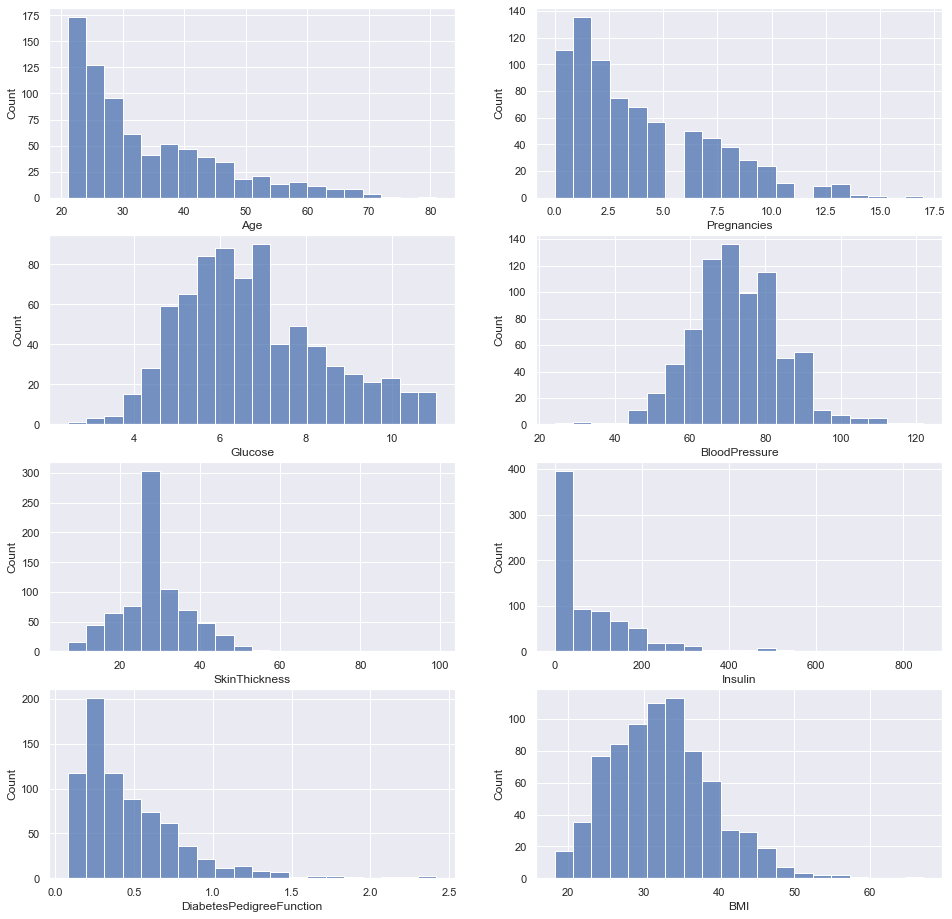

In [7]:
#Visualize data spread by creating a count for each category of data
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.histplot(pima_df.Age, bins = 20, ax=ax[0,0])
sns.histplot(pima_df.Pregnancies, bins = 20, ax=ax[0,1])
sns.histplot(pima_df.Glucose, bins = 20, ax=ax[1,0])
sns.histplot(pima_df.BloodPressure, bins = 20, ax=ax[1,1])
sns.histplot(pima_df.SkinThickness, bins = 20, ax=ax[2,0])
sns.histplot(pima_df.Insulin, bins = 20, ax=ax[2,1])
sns.histplot(pima_df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0])
sns.histplot(pima_df.BMI, bins = 20, ax=ax[3,1])

Next, a correlation heatmap was created to see what variables seem to correlate most with the outcome. Based on the correlation map below, it seems that glucose has the highest correlation with outcome, followed by BMI, pregnancies, and Age. Blood Pressure and Skin Thickness don't appear to have much corelation with the outcome. This seems like a logical correlation.

<AxesSubplot:>

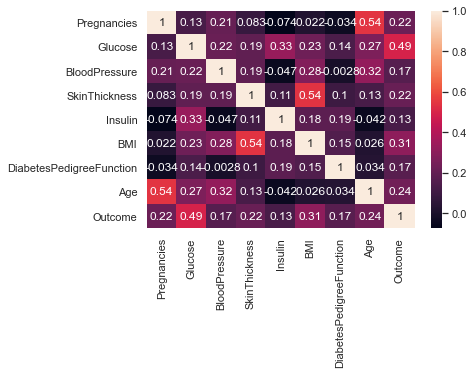

In [8]:
sns.heatmap(pima_df.corr(), annot=True)

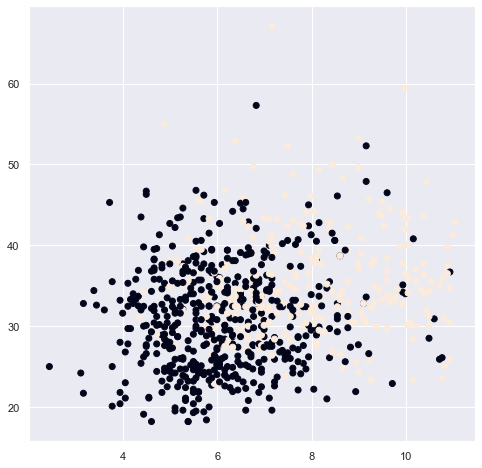

In [9]:
fig = plt.figure(figsize=(8,8))
plt.scatter(pima_df['Glucose'], pima_df['BMI'],c=pima_df['Outcome'])

# k Nearest Neighbor Regression

In [10]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

Perform KNN analysis on data (https://towardsdatascience.com/k-nearest-neighbor-python-2fccc47d2a55). Start with Glucose and BMI as variables because these are the two that seem to have the most coorelation with the Outcome. Create training and test data split 75/25. Then output the accuracy.

When running KNN for k = 1 to 100, the best accuracy I was able to get was 78% with a value of k = 24.

In [11]:
X = pima_df[['Glucose', 'BMI']]
y = pima_df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [12]:
accuracies=[]

for k in range(100):
    knn = KNeighborsClassifier(n_neighbors=k+1, metric='euclidean')
    knn.fit(X_train, y_train)
    
    y_pred_knn = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred_knn))

accuracy_knn = max(accuracies)
MSE_knn = np.sum((y_test-y_pred_knn)**2)/len(y_test)
print("For KNN analysis:")
print("MSE = %.3f" % MSE_knn)
print("Testing Accuracy is %.1f%% when k = %d" % (accuracy_knn*100, accuracies.index(accuracy_knn)))

For KNN analysis:
MSE = 0.255
Testing Accuracy is 78.1% when k = 24


Create two graphs to show the actual classification of the test data and the predicted classification using KNN.

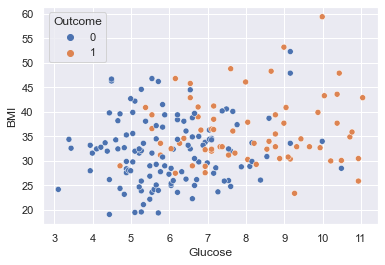

In [13]:
sns.scatterplot(
    x='Glucose',
    y='BMI',
    hue='Outcome',
    data=X_test.join(y_test, how='outer')
);

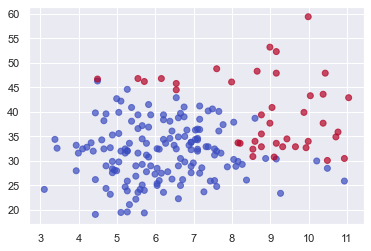

In [14]:
plt.scatter(
    X_test['Glucose'],
    X_test['BMI'],
    c=y_pred_knn,
    cmap='coolwarm',
    alpha=0.7
);

# Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

Perform logistic regression using only Glucose and BMI as variables. Got a testing accuracy of 75.5%

In [16]:
X = pima_df[['Glucose', 'BMI']]
y = pima_df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [17]:
model_lr = LogisticRegression(solver='liblinear', random_state=0)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
MSE_lr = np.sum((y_test-y_pred_lr)**2)/len(y_test)
print("MSE = %.3f" % MSE_lr)
print("Testing Accuracy: %.3f" % accuracy_lr)

MSE = 0.245
Testing Accuracy: 0.755


Test all varibles in logistic regression and see which ones affect the accuracy. Got an accuracy of 78.6% with Pregnancies, Glucose, Skin Thickness and BMI.

In [18]:
X = pima_df[['Pregnancies','Glucose', 'SkinThickness','BMI']]#'BloodPressure',,'Insulin','DiabetesPedigreeFunction','Age'
y = pima_df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [19]:
model_lr2 = LogisticRegression()
model_lr2.fit(X_train, y_train)
y_pred_lr2 = model_lr2.predict(X_test)

accuracy_lr2 = accuracy_score(y_test, y_pred_lr2)
MSE_lr2 = np.sum((y_test-y_pred_lr2)**2)/len(y_test)
print("MSE = %.3f" % MSE_lr2)
print("Testing Accuracy: %.3f" % accuracy_lr2)

MSE = 0.214
Testing Accuracy: 0.786


Next, we'll see how our model performs when we apply 10-fold cross validation.

In [20]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

def verify_accuracy_10_fold(model):
    cv = KFold(n_splits=10, random_state=1, shuffle=True)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv)
    print('Accuracy: %.3f (std = %.3f)' % (np.mean(scores), np.std(scores)))

print('Glucose and BMI model')
verify_accuracy_10_fold(model_lr)

print('Pregnancies, Glucose, SkinThickness, and BMI model')
verify_accuracy_10_fold(model_lr2)

Glucose and BMI model
Accuracy: 0.762 (std = 0.040)
Pregnancies, Glucose, SkinThickness, and BMI model
Accuracy: 0.769 (std = 0.041)


We see that the difference in accuracies is not very significant when we running the models through cross validation. While the more complex model performs ever so slightly better than the simpler model, we cannot say much about how they compare without providing further data.

Next, we'll plug an additional dataset to the models and see how they perform.

In [21]:
from sklearn.metrics import mean_squared_error

print("Model 1")
y_pred_lr_german = model_lr.predict(german_df[['Glucose', 'BMI']])
print("MSE = %.3f" % mean_squared_error(german_df['Outcome'], y_pred_lr_german))
print("Testing Accuracy: %.3f" % accuracy_score(german_df['Outcome'], y_pred_lr_german))

print("Model 2")
y_pred_lr2_german = model_lr2.predict(german_df[['Pregnancies','Glucose', 'SkinThickness','BMI']])
print("MSE = %.3f" % mean_squared_error(german_df['Outcome'], y_pred_lr2_german))
print("Testing Accuracy: %.3f" % accuracy_score(german_df['Outcome'], y_pred_lr2_german))

Model 1
MSE = 0.247
Testing Accuracy: 0.752
Model 2
MSE = 0.223
Testing Accuracy: 0.777


As we can see, the performance is pretty close to the original dataset. It is safe to say that our linear model generalizes well.

# Gradient Boosting

In this section we apply a novel classification technique, namely gradient boosting.
This technique is a subclass of boosting machine learning methods, which rely on iteratively finding and combining weak classifiers to form a combined well-performing classifier.
In gradient boosting, these classifiers are tree-based learners.

For finding the best possible classifier, we optimize the model's hyperparameters using grid search cross validation.

In [22]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import GridSearchCV

X, y = pima_df.drop('Outcome', axis=1), pima_df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [23]:
# Articles about xgboost:
# https://www.datacamp.com/community/tutorials/xgboost-in-python
# https://www.mikulskibartosz.name/xgboost-hyperparameter-tuning-in-python-using-grid-search/
# Optimal parameters from the following paper:
# https://bmcendocrdisord.biomedcentral.com/articles/10.1186/s12902-019-0436-6
model_params = {
    # Params from paper
    # Number of trees
    'n_estimators': 257,
    'learning_rate': 0.126,
    # Maximum depth of each tree during training
    'max_depth': 2,
    # Equivalent of n.minobsinnode in R
    'min_child_weight': 75,
    # For consistent results
    'seed': 2212,
}

xgb_model = xgb.XGBClassifier(**model_params)
parameters = {
    'objective': ['reg:squarederror'],
    'max_depth': range(2, 10, 1),
    'n_estimators': [100, 250, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.125]
}
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=parameters,
    scoring='roc_auc',
    n_jobs=10,
    cv=10,
    verbose=False
)

grid_search.fit(X_train, y_train)

# Use the best estimator
xgb_model = grid_search.best_estimator_

print("Training accuracy = %f" % balanced_accuracy_score(xgb_model.predict(X_train), y_train))
print("Testing accuracy = %f" % balanced_accuracy_score(xgb_model.predict(X_test), y_test))

Training accuracy = 0.796111
Testing accuracy = 0.718666


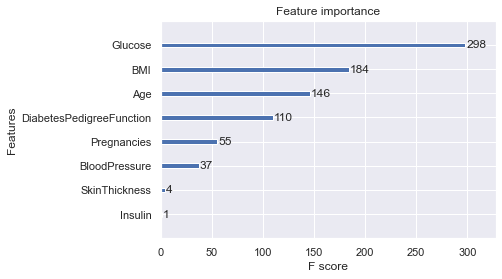

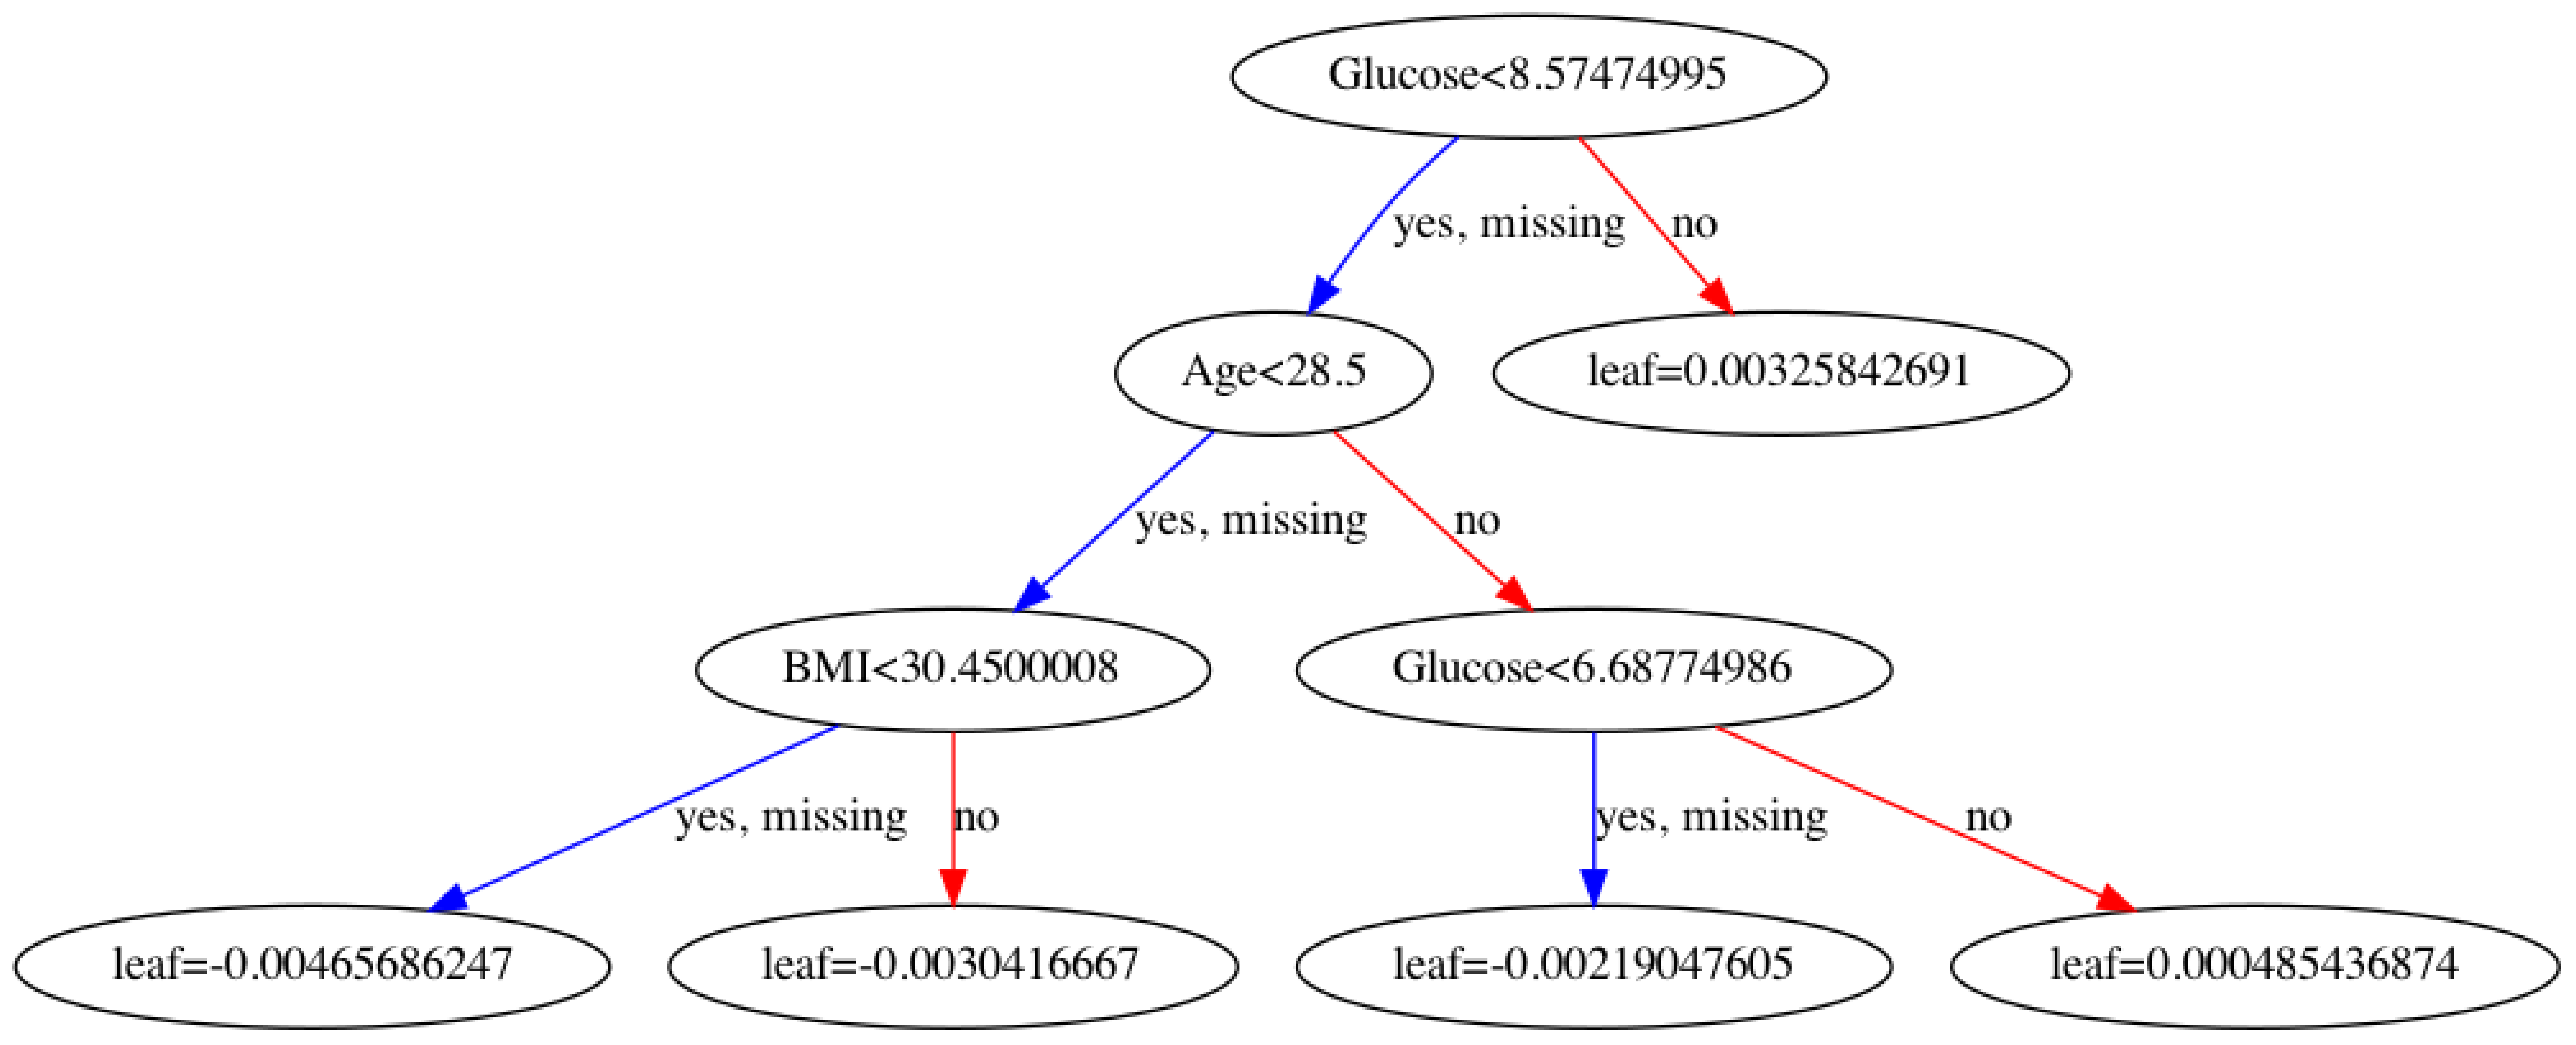

In [24]:
xgb.plot_importance(xgb_model)
xgb.plot_tree(xgb_model)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(150, 100)

As per the initial analysis, we see that `Glucose` has the highest impact on the outcome of the diagnosis. Lets see how our model performs with the German dataset.

In [26]:
xgb_accuracy_german = balanced_accuracy_score(xgb_model.predict(german_df.drop('Outcome', axis=1)), german_df['Outcome'])
print("Accuracy on new data = %f" % xgb_accuracy_german)

Accuracy on new data = 0.771457


# Neural Networks

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import accuracy_score
keras.backend.set_floatx('float64')

In the next cells, we're attempting to utilize neural networks for predicting diabetes within patients. As a reference, we're using a study conducted in 2018 which used neural networks for making similar predictions ([Predicting Diabetes Mellitus With Machine Learning Techniques](https://www.frontiersin.org/articles/10.3389/fgene.2018.00515/full)).

To find the best possible model, we use grid search cross validation with 10 folds.

In [28]:
_, columns = X_train.shape

def build_model():
    # Good reference:
    # https://www.pluralsight.com/guides/deep-learning-model-perform-binary-classification
    model = Sequential()
    model.add(Dense(12, input_dim=columns, activation=tf.nn.relu))
    for _ in range(10):
        model.add(Dense(12, activation=tf.nn.relu))
    model.add(Dense(1, activation=tf.nn.sigmoid))
    model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

param_grid = {
    'batch_size': [1, 10, 50, 100],
    'epochs': [100, 250, 500],
}
nn_model = KerasClassifier(build_fn=build_model, verbose=False)
grid = GridSearchCV(estimator=nn_model, param_grid=param_grid, n_jobs=10, cv=10)
grid_result = grid.fit(X_train, y_train)

nn_model = grid_result.best_estimator_

In [30]:
y_hat = (nn_model.predict(X_train)>0.5).astype("int32")
print("Training accuracy : %f" % accuracy_score(y_train,y_hat))

y_hat = (nn_model.predict(X_test)>0.5).astype("int32")
print("Testing accuracy : %f" % accuracy_score(y_test,y_hat))

y_hat = (nn_model.predict(german_df.drop('Outcome', axis=1))>0.5).astype("int32")
print("Testing accuracy for german dataset : %f" % accuracy_score(german_df['Outcome'],y_hat))

Training accuracy : 0.805447
Testing accuracy : 0.763780
Testing accuracy for german dataset : 0.794500


We're able to achieve a relatively good accuracy with our model for both the Pima India dataset and the German dataset. So far, this is the highest accuracy we have seen in our data. 

In [31]:
nn_model.get_params()

{'verbose': False,
 'batch_size': 1,
 'epochs': 500,
 'build_fn': <function __main__.build_model()>}